In [1]:
import numpy as np
import matplotlib.pyplot as plt

Parameters (w) for Degree 3: [ 5.94388934e+00  3.20508479e+00  2.67695973e-02 -5.60826064e-03]


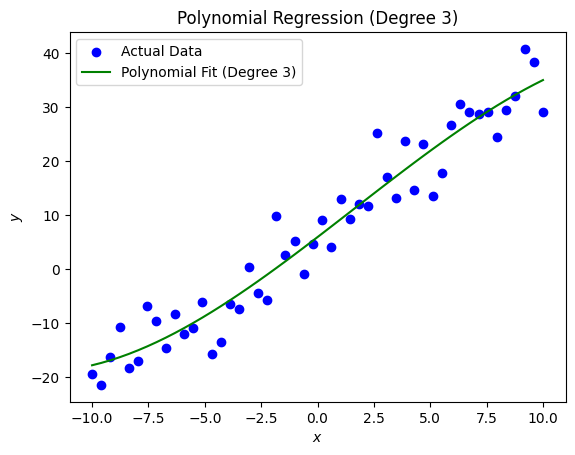

In [30]:
# Data Generation Function (this function products linear data with noise)
n_samples=50
m=3

def generate_data(n_samples=50, noise=5.0):
    np.random.seed(42)
    X = np.linspace(-10, 10, n_samples)
    # Ground truth line: y = 3x + 8
    true_slope = 3
    true_intercept = 8
    noise = np.random.randn(n_samples) * noise
    y = true_slope * X + true_intercept + noise
    return X, y

# Call Generation Data Function and Generate x and y Values
X, y = generate_data(n_samples, noise=5.0)

# Polynomial X-matrix generator Function 
def polynomial_features(x,degree):
    X_poly=np.c_[np.ones(len(x))]
    for i in range(1,degree+1):
        X_poly=np.c_[X_poly,X**i]

    return X_poly


# Polynomial Regression Function
def polynomialRegression(x,y,degree):
    X_poly=polynomial_features(x,degree)
    w = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
    #w=np.linalg.pinv(X_poly).dot(y) # we can use this fantastic numpy-function for calculating w matrix 
    return w

w_poly=polynomialRegression(X,y,m)
print(f"Parameters (w) for Degree {m}: {w_poly}")


# Visualize and plotting
X_fit = np.linspace(X.min(), X.max(), n_samples)
X_fit_poly = polynomial_features(X_fit, m)
y_poly_pred = X_fit_poly.dot(w_poly)  # h_w(x) = X' * w

# Plot the actual data and the polynomial fit
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_fit, y_poly_pred, color='green', label=f'Polynomial Fit (Degree {m})')
plt.title(f"Polynomial Regression (Degree {m})")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()